In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import statsmodels.api as sm
from scipy import stats
import statistics
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats import weightstats as stests
# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency,chisquare,chi2
# function to perform post-hoc test
import statsmodels.stats.multicomp as mc
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
Age=[42,44,62,35,20,30,56,20,23,41,55,22,31,27,66,21,18,24,42,25,32,50,31,26,36,39,40,18,36,22]

# Q1. Compute the mean, median and the mode of the data

In [88]:
mean=np.mean(Age)
median=np.median(Age)
mode=statistics.mode(Age)
print('mean:',mean)
print('median:',median)
print('mode:',mode)

mean: 34.46666666666667
median: 31.5
mode: 42


# Q2. Compute the range , variance and standard deviation of customer ages

In [91]:
rnge=np.max(Age)-np.min(Age)
variance=np.var(Age)
std=np.std(Age)
print('range:',rnge)
print('variance:',variance)
print('std:',std)

range: 48
variance: 171.4488888888889
std: 13.093849277003645


# Q3. Find the mean deviation for the data . The mean deviation is defined as below.

In [96]:
mean_val = np.mean(Age)
n=len(Age)
mean_deviation=sum([abs(x-mean_val) for x in Age])
mean_deviation=mean_deviation/n
mean_deviation

10.764444444444443

# Q4. Calculate the Pearson coefficient of skewness and comment on the skewness of the data

In [97]:
from scipy.stats import skew
mean_val = np.mean(Age)
median=np.median(Age)
std=np.std(Age)

p_c_skew=(3*(mean_val-median))/std
p_c_skew

0.6797084502592238

In [ ]:
# we can observe that when we do pearson coeficient it is positively skewness in data, i.e right skewed

# Q5. Count the number of data values that fall within two standard deviations of the mean. Compare this with the answer from Chebyshev’s Theorem.

In [100]:
mean = np.mean(Age)
std = np.std(Age)

lower_limit = (mean - 2 * std)
upper_limit = (mean + 2 * std)

val = [x for x in Age if lower_limit <= x <= upper_limit]
count = len(val)
print(val)
print("number of data values that fall within two standard deviations of the mean:", count)

[42, 44, 35, 20, 30, 56, 20, 23, 41, 55, 22, 31, 27, 21, 18, 24, 42, 25, 32, 50, 31, 26, 36, 39, 40, 18, 36, 22]
number of data values that fall within two standard deviations of the mean: 28


# Q6. Find the three quartiles and the interquartile range (IQR).

In [36]:
quartile_1=np.quantile(Age,q=0.25)
quartile_2=np.quantile(Age,q=0.50)
quartile_3=np.quantile(Age,q=0.75)
print(quartile_1,quartile_2,quartile_3)

IQR=(quartile_3-quartile_1)
print(IQR)

23.25 31.5 41.75
18.5


# Q7. Are there any outliers in the data set ?

In [102]:
q1 = np.percentile(Age, 25)
q3 = np.percentile(Age, 75)
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

outliers = [x for x in Age if x < lower_bound or x > upper_bound]

print("Upper bound:", upper_bound)
print("Lower bound:", lower_bound)
print("Outliers:", outliers)
# NO there are no outlier are present in the dataset

Upper bound: 69.5
Lower bound: -4.5
Outliers: []


# Q8. Draw a boxplot of the dataset to confirm

<AxesSubplot:>

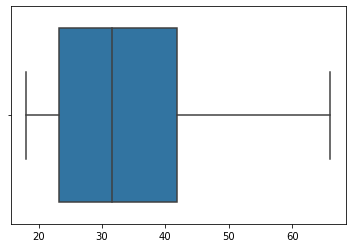

In [41]:
sns.boxplot(Age)

from above plot we can observe that there is no outlier in the data

# Q9. Find the percentile rank of the datapoint 50.

In [104]:
num_below_50 = len([x for x in Age if x < 50])
total_num = len(Age)

percentile_rank = (num_below_50 / total_num) * 100

print("Percentile rank of 50:", round(percentile_rank,3))

Percentile rank of 50: 83.333


# Q10. What is the probability that a person ordering an EV scooter is above 50 years old?

In [105]:
count = 0
for x in Age:
    if x > 50:
        count += 1

In [106]:
prob = count / len(Age)
prob

0.13333333333333333

# Q11. Create a frequency distribution for the data and visualize it appropriately

<AxesSubplot:ylabel='Density'>

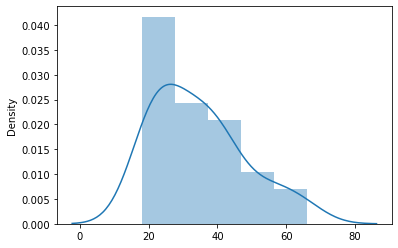

In [107]:
Age = [42,44,62,35,20,30,56,20,23,41,55,22,31,27,66,21,18,24,42,25,32,50,31,26,36,39,40,18,36,22]
sns.distplot(Age)

# Q12. Create a probability distribution of the data and visualize it appropriately.

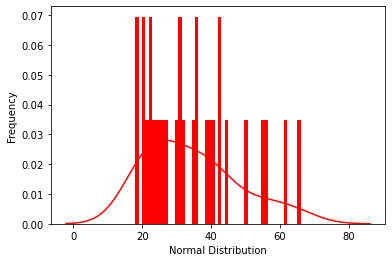

In [68]:
ax = sns.distplot(Age,
                  bins=50,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
 
plt.show()

# Q13. What is the shape of the distribution of this dataset? Create an
appropriate graph to determine that. Take 100 random samples with
replacement from this dataset of size 5 each. Create a sampling distribution of
the mean age of customers. Compare with other sampling distributions of
sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate
the Central Limit Theorem?Q13. What is the shape of the distribution of this dataset? Create an
appropriate graph to determine that. Take 100 random samples with
replacement from this dataset of size 5 each. Create a sampling distribution of
the mean age of customers. Compare with other sampling distributions of
sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate
the Central Limit Theorem?

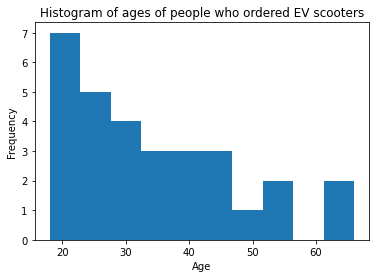

In [108]:
Age = [42,44,62,35,20,30,56,20,23,41,55,22,31,27,66,21,18,24,42,25,32,50,31,26,36,39,40,18,36,22]
plt.hist(Age)
plt.title("Histogram of ages of people who ordered EV scooters")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


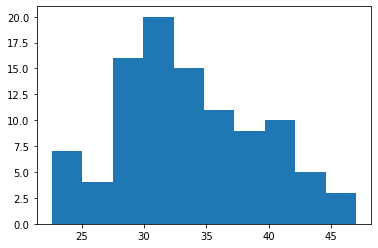

In [110]:
sample_means = []
for i in range(100):
    sample = np.random.choice(Age, size=5, replace=True)
    sample_means.append(np.mean(sample))
plt.hist(sample_means)
plt.show()

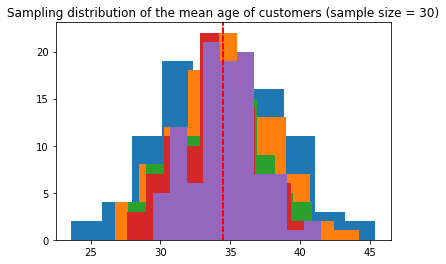

In [113]:
sample_sizes = [10, 15, 20, 25, 30]
for size in sample_sizes:
    sample_means = []
    for i in range(100):
        sample = np.random.choice(Age, size=size, replace=True)
        sample_means.append(np.mean(sample))
    plt.axvline(x=np.mean(Age), color='red', linestyle='--')
    plt.hist(sample_means)
    plt.title("Sampling distribution of the mean age of customers (sample size = {})".format(size))

# Q14. Treat this dataset as a binomial distribution where p is the probability that a person ordering an EV is above 50 years age. What is the probability that out of a random sample of 10 buyers exactly 6 are above 50 years of age

In [114]:
p=0.13333
k=6
n=10
binomial=stats.binom.pmf(k,n,p)
round(binomial,5)

0.00067

# Q15. A study claims that 10% of all customers for an EV scooter are above 50 years of age. Using the Normal approximation of a Binomial distribution, find the probability that in a random sample of 300 prospective customers exactly 25 will be above 50 years of age. [ Note that the normal distribution can be used to approximate a binomial distribution if np>=5 and nq>=5 with the following correction for continuity P(X=z) = P(z-0.5 < X < z+0.5 ) ]

In [3]:
x=25
p=0.1
n=300
# Calculate mean and standard deviation
mu = n * p
sigma = (n * p * (1 - p))**0.5

# Calculate z-score using continuity correction
z = (x - mu) / sigma
lower = (x - 0.5 - mu) / sigma
upper = (x + 0.5 - mu) / sigma

prob = stats.norm.cdf(upper) - stats.norm.cdf(lower)
print(lower)
print(upper)
print(prob)

-1.058475493514314
-0.8660254037844386
0.04831875658186224


# Q16. Compute a 95% Confidence Interval for the true mean age of the population of EV scooter buyers for the dataset using appropriate distribution.(State reasons as to why did you use a z or t distribution

In [6]:
n=30
c_i=0.95
std=np.std(Age)
interval=stats.norm.interval(0.95,loc=np.mean(Age),scale=std/np.sqrt(n))
interval

(29.781178977640657, 39.15215435569268)

we can use a t-distribution to compute the confidence interval if the sample size is small (less than 30) or the population standard deviation is unknown. If the sample size is large (greater than or equal to 30) and the population standard deviation is known or the sample size is sufficiently large, then we can use a z-distribution

# Q17. A data scientist wants to estimate with 95% confidence the proportion of people who own an EV in the population. A recent study showed that 20% of people interviewed had an EV. The data scientist wants to be accurate within 2% of the true proportion. Find the minimum sample size necessary.

In [15]:
p=0.2
m_e=0.02
alpha=0.5
z = stats.norm.ppf(0.95)    # Critical value at 95% confidence level

# Compute minimum sample size
n = ((z / m_e)**2 * p * (1 - p))  # round up to nearest integer

print("Minimum sample size necessary:", n)

Minimum sample size necessary: 1082.2173816381653


# Q18. The same data scientist wants to estimate the proportion of executives who own an EV. She wants to be 90% confident and accurate within 5% of true proportion. Find the minimum sample size necessary

In [19]:
p=0.2
m_e=0.05
alpha=0.1
z = stats.norm.ppf(0.95)    # Critical value at 95% confidence level

# Compute minimum sample size
n = ((z / m_e)**2 * p * (1 - p))  # round up to nearest integer

print("Minimum sample size necessary:", n)

Minimum sample size necessary: 173.15478106210648


# Q19. A researcher claims that currently 20% of the population are owning EVs. Test his claim with an alpha =0.05 if out of a random sample of 30 two-wheeler owners only 5 own an EV.

In [22]:
alpha=0.05
n=30
p=0.2
k=5

stats.binom.cdf(k,n,p)

0.427512437590322

# Q20. Assume you are working for a Consumer Protection Agency that looks at complaints raised by customers for the transportation industry. Say you have been receiving complaints about the mileage of the latest EV launched by the Zen Automotives. Zen allows you to test randomly 40 of its new EVs to test mileage. Zen claims that the new EVs get a mileage of 96 kmpl on the highway. Your results show a mean of 91.3 kmpl and a standard deviation of 14.4. a. Show why you support Zen’s claim using the P-value obtained. b. After more complaints you decide to test the variability of the mileage on the highway. On questioning Zen’s quality control engineer , you find that they are claiming a standard deviation of 7.2. Test the claim about the standard deviation. [Hint :use the Chi-square test for variance/standard deviation] c. Write a summary of results and the action that Zen must take to remedy the complaints. d. What is your position on performing the test for variability along with the test for means?

In [39]:
# H0:that the true population mean is equal to 96 kmpl
# H1: true population mean that it is less than 96 kmpl.
def t_test(pop_mean, samp_std, n, samp_mean):
   
    # calculate the test statistic
    t_score = (samp_mean - pop_mean) / (samp_std / np.sqrt(n))

    # return the t-test value
    return t_score

# given data
n = 40
pop_mean = 96
samp_std = 14.4
samp_mean = 91.3

# calculate the test statistic using the function 't_test'
t_score = t_test(pop_mean, samp_std, n, samp_mean)
print("t-score:", t_score)

p_value = stats.t.cdf(t_score, df = 39)

print('p-value:', p_value)

t-score: -2.0642645837210267
p-value: 0.02284465174557921


In [31]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis.


In [43]:
alpha = 0.05
n = 40
s = 7.2
df=39
chi_critical_left = stats.chi2.ppf(alpha / 2, df)
chi_critical_right = stats.chi2.ppf(1 - alpha / 2, n - 1)
chi_stat = df * s ** 2 / 49
chi_stat

41.26040816326531

In [44]:
if chi_stat > chi_critical_left and chi_stat < chi_critical_right:
    print("We fail to reject Zen's claim that the standard deviation of mileage on the highway is 7.2.")
else:
    print("We reject Zen's claim that the standard deviation of mileage on the highway is 7.2.")

We fail to reject Zen's claim that the standard deviation of mileage on the highway is 7.2.
